In [183]:
import pandas as pd
from matplotlib import pyplot as plt
import keras
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import minmax_scale, MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split

In [184]:
df = pd.read_csv('data/BTC-USD.csv')
df = df[[ 'Date', 'Open', 'High', 'Low', 'Volume', 'Adj Close', 'Close']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2788 entries, 0 to 2787
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2788 non-null   object 
 1   Open       2788 non-null   float64
 2   High       2788 non-null   float64
 3   Low        2788 non-null   float64
 4   Volume     2788 non-null   int64  
 5   Adj Close  2788 non-null   float64
 6   Close      2788 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 152.6+ KB


In [185]:
df['Close'].sum()

33808449.402894005

In [186]:
df['Date'] = pd.to_datetime(df['Date'])

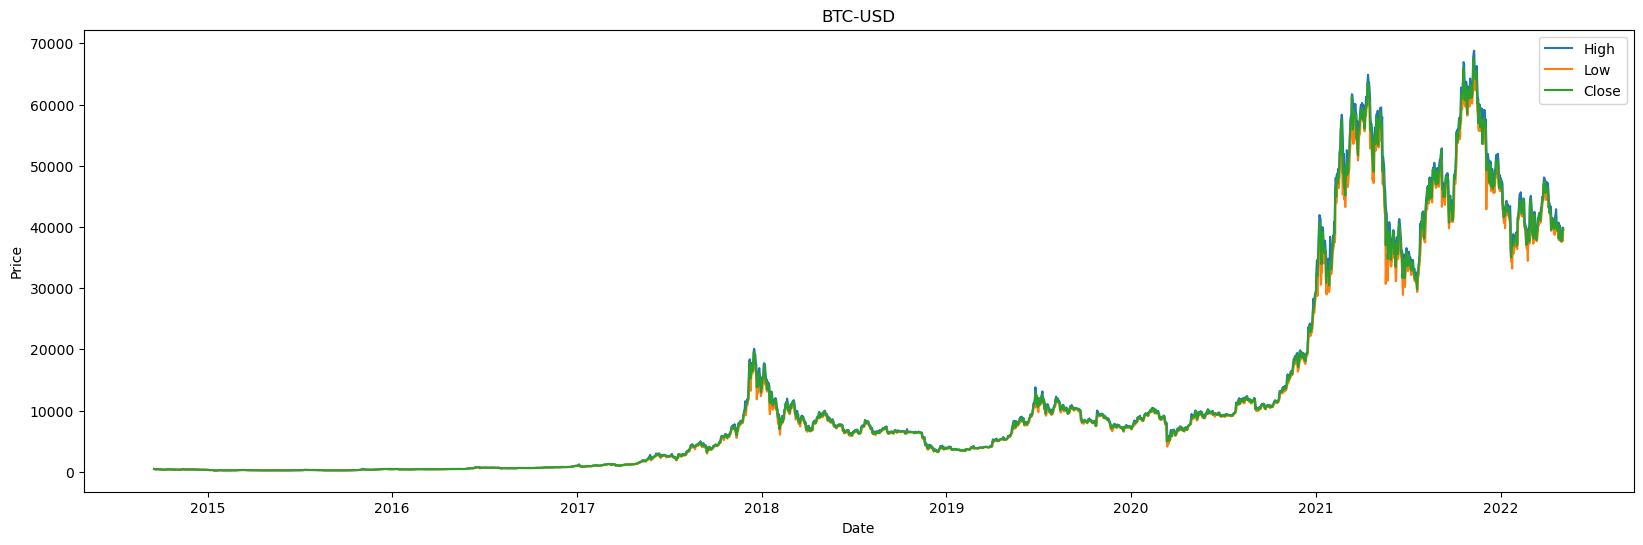

In [187]:
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(df["Date"], df['High'], label='High')
ax.plot(df["Date"], df['Low'], label='Low')
ax.plot(df["Date"], df['Close'], label='Close')

ax.set_title('BTC-USD')
ax.set_xlabel('Date')
ax.set_ylabel('Price') 
ax.legend()
plt.show()

In [188]:
scaler = MinMaxScaler(feature_range=(0, 1))

df.drop(columns=['Adj Close', 'High', 'Low'], axis=1, inplace=True)
scaled_df = scaler.fit_transform(df[['Open', 'Volume', 'Close']].values)

In [189]:
def create_dataset(X, time_steps=1):
    Xs, ys = [], []
    for i in range(time_steps, len(X)):
        Xs.append(X[i-time_steps:i, :-1])
        ys.append(X[i, -1])
    return np.array(Xs), np.array(ys)

time_steps = 50

X, y = create_dataset(scaled_df, time_steps)

In [190]:
print(y[-1])

0.5845296735942133


In [191]:
print(scaled_df[-1])

[0.5870391  0.09883453 0.58452967]


In [192]:
print(X)

[[[4.28907290e-03 4.31449241e-05]
  [4.15542811e-03 8.14009147e-05]
  [3.66922344e-03 9.11925723e-05]
  ...
  [2.20670530e-03 2.00418548e-05]
  [2.23033516e-03 2.77549400e-05]
  [2.28261146e-03 3.96129180e-05]]

 [[4.15542811e-03 8.14009147e-05]
  [3.66922344e-03 9.11925723e-05]
  [3.23240062e-03 8.81834148e-05]
  ...
  [2.23033516e-03 2.77549400e-05]
  [2.28261146e-03 3.96129180e-05]
  [2.41285674e-03 3.67060508e-05]]

 [[3.66922344e-03 9.11925723e-05]
  [3.23240062e-03 8.81834148e-05]
  [3.43147175e-03 5.88825241e-05]
  ...
  [2.28261146e-03 3.96129180e-05]
  [2.41285674e-03 3.67060508e-05]
  [2.56662769e-03 3.11134230e-05]]

 ...

 [[5.59118791e-01 6.92845454e-02]
  [5.86101974e-01 6.81785620e-02]
  [5.81223455e-01 1.12864067e-01]
  ...
  [5.70392518e-01 6.80694700e-02]
  [5.57143948e-01 7.69224117e-02]
  [5.68408456e-01 9.37899982e-02]]

 [[5.86101974e-01 6.81785620e-02]
  [5.81223455e-01 1.12864067e-01]
  [6.08018726e-01 6.26953483e-02]
  ...
  [5.57143948e-01 7.69224117e-02]
  [5

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [194]:
model = keras.Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])), 
    Dropout(0.2), 
    LSTM(50, return_sequences=False), 
    Dropout(0.2), 
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\shahm\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [195]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0189
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0026
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0016
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0014
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0017
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0016
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0013
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0011
Epoch 9/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0017
Epoch 10/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0014
Epoch 11/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0014
Epoch 12/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0016
Epoch 13/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0012
Epoch 14/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0013
Epoch 15/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0011
Epoc

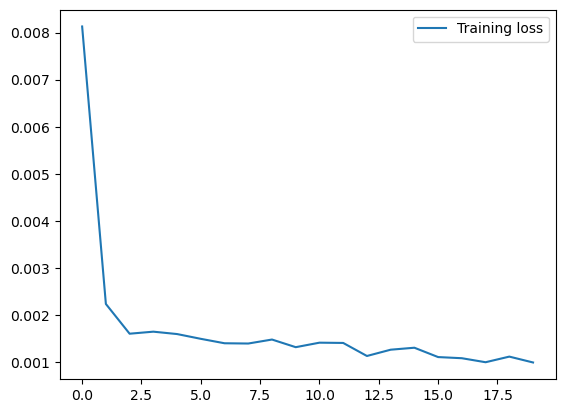

In [196]:
plt.plot(history.history['loss'], label='Training loss')
# plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [201]:
last_7_days = [62983.82, 44654880747]

In [202]:
predicted_prices = model.predict(X_test)

ValueError: Unrecognized data type: x=[62983.82, 44654880747] (of type <class 'list'>)

In [182]:
dummy_test = np.zeros(shape=(len(predicted_prices), scaled_df.shape[1]))
dummy_test[:, 2] = predicted_prices[:, 0]

predicted_prices_original = scaler.inverse_transform(dummy_test)[:, 2]

print(dummy_test.shape)

In [177]:
dummy_test = np.zeros(shape=(len(y_test), scaled_df.shape[1]))
dummy_test[:, 2] = y_test

y_test_original = scaler.inverse_transform(dummy_test)[:, 2]
print(dummy_test.shape)

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(y_test_original, color='blue', label='Actual Bitcoin Closing Price')
plt.plot(predicted_prices_original, color='red', label='Predicted Bitcoin Closing Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.metrics import mean_squared_error

mse_tensor = mean_squared_error(y_test_original, predicted_prices_original)
mse_value = mse_tensor.numpy()
print(mse_value)

In [ ]:
difference_in_percentage = (mse_value/df['Close'].sum())*100

print(difference_in_percentage)

In [173]:
print(predicted_prices_original)

In [174]:
print(y_test_original)